# Neural Network version 1

Source: https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-binary-classification-49596d7dcabf

In [24]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

## Import data

In [15]:
# Read file
from deezerData import readData
df, X, y, X_train, X_test, y_train, y_test = readData()
# Making arrays
X, y, X_train, X_test, y_train, y_test = X.values, y.values, X_train.values, X_test.values, y_train.values, y_test.values

In [27]:
# check distribution of target variable
df['is_listened'].value_counts()

1    8706
0    4217
Name: is_listened, dtype: int64

In [33]:
df.columns

Index(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family', 'media_duration',
       'listen_type', 'user_gender', 'user_id', 'artist_id', 'user_age',
       'is_listened'],
      dtype='object')

In [28]:
# our model should at least better than a dummy model
(4217/(4217+8706))

0.32631741855606283

## Building an Neural Network

The steps are as follows:
    
* Use the Sequential API to build your model
* Specify an optimizer (in this case, we use Adam)
* Set a loss function (binary_crossentropy)
* Fit the model (make a new variable called ‘history’ so you can evaluate the learning curves)
* EarlyStopping callbacks to prevent overfitting (patience of 10)


In [35]:
# Build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# Compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                240       
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dense_22 (Dense)            (None, 1)                 17        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
827/827 [==============================] - 1s 1ms/step - loss: 1412253.5000 - accuracy: 0.5599 - val_loss: 979124.1250 - val_accuracy: 0.3254
Epoch 2/80
827/827 [==============================] - 1s 1ms/step - loss: 871374.7500 - accuracy: 0.5589 - val_loss: 824852.3125 - val_accuracy: 0.3264
Epoch 3/80
827/

## Evaluate the Model


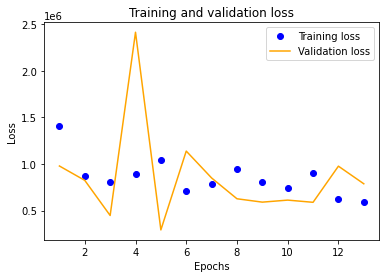

In [37]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

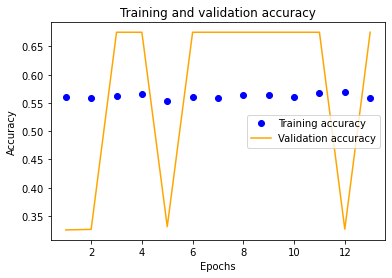

0.6750483512878418

In [38]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [40]:
# see how these are numbers between 0 and 1? 
model.predict(X_test) # prob of successes (is_listened)
np.round(model.predict(X_test),0) # 1 and 0 (is_listened or not)
y # 1 and 0 (is_listened or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)
print(classification_report(y_test, preds))
print(roc_auc_score(y_test, preds))

[[   0  847]
 [   0 1738]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       847
           1       0.67      1.00      0.80      1738

    accuracy                           0.67      2585
   macro avg       0.34      0.50      0.40      2585
weighted avg       0.45      0.67      0.54      2585

0.5


C:\Users\duong\Anaconda3\envs\duong\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\duong\Anaconda3\envs\duong\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\duong\Anaconda3\envs\duong\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
